This is an individual work on the boston housing, based on the instructions from boston_housong.ipynb. I basically followed the steps in the original notebook, but using the original un-cleaned dataset, so that I can walk thru the data-cleaning process as well.

In this notebook, I also updated the data link (the one in the original notebook has been moved)

## Getting data

The dataset is originated from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). Data columns:
```
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
             25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
             river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
             by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
```

In [12]:
import os
import requests
import pandas as pd


# helper function for downloading data
def download_data(url, path):
    response = requests.get(url)
    
    # if it's a bad request, raise the exception
    response.raise_for_status()
    
    # write to local path
    with open(path, 'wb') as fd:
        for chunk in response.iter_content(chunk_size=1024):
            fd.write(chunk)


# dataset url
dataset_url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

# download data to current directory, if data doesn't exist
data_path = r'./housing.data'
if not os.path.exists(data_path):
    download_data(dataset_url, data_path)
    assert os.path.exists(data_path)
    
# loading data into dataframe
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
            'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_table(data_path, delim_whitespace=True, header=None,
                  names=colnames)
print(df.head())
print(df.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)


In [15]:
# we only care about 'RM', 'LSTAT', 'PTRATIO', and 'MEDV'
data = df[['RM', 'LSTAT', 'PTRATIO', 'MEDV']]

# check if the data has missing values
for col, series in data.items():
    print(f'missing data in {col} = {sum(series.isnull())}')

missing data in RM = 0
missing data in LSTAT = 0
missing data in PTRATIO = 0
missing data in MEDV = 0


In [18]:
# split data into features and prices
features = data['MEDV']
prices = data.drop('MEDV', axis=1)

## Exploring the data

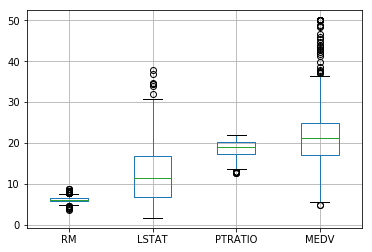

In [17]:
# use boxplot to check outliers
# Pretty display for notebooks
%matplotlib inline

data.boxplot()